# Time Series Forecasting with Tensorflow



### Getting the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-05-27 07:32:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-05-27 07:32:23 (6.88 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Importing time series with pandas

In [2]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col=["Date"]) # prase the data column and tell pandas column 1 is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# how many samples 
len(df)

2787


We've collected the historical price of Bitcoin for the past ~8 years but there's only 2787 total samples.

This is something you'll run into with time series data problems. Often, the number of samples isn't as large as other kinds of data.

**Seasonality ** -->The frequency at which a time series value is collected is often referred to as seasonality. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a seasonality of 365. 

In [5]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


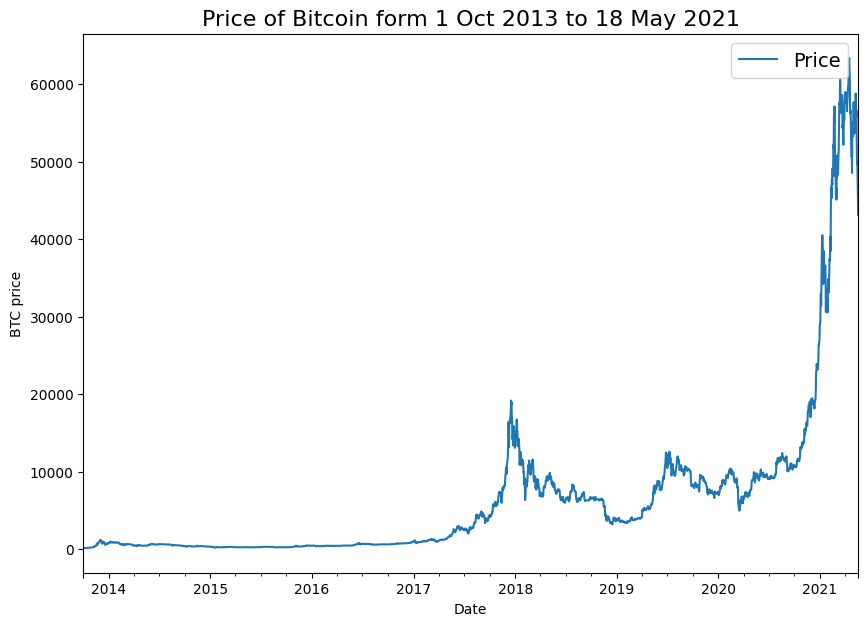

In [6]:
# plotting the data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC price")
plt.title("Price of Bitcoin form 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14);

## importing time series data with Python CSV module

In [7]:
# importing and formattinh historical bitcoin data with python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) # skip first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the dates as dates not string
    btc_price.append(float(line[2])) # get the closing price as float

# view first 10
timesteps[:10] , btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

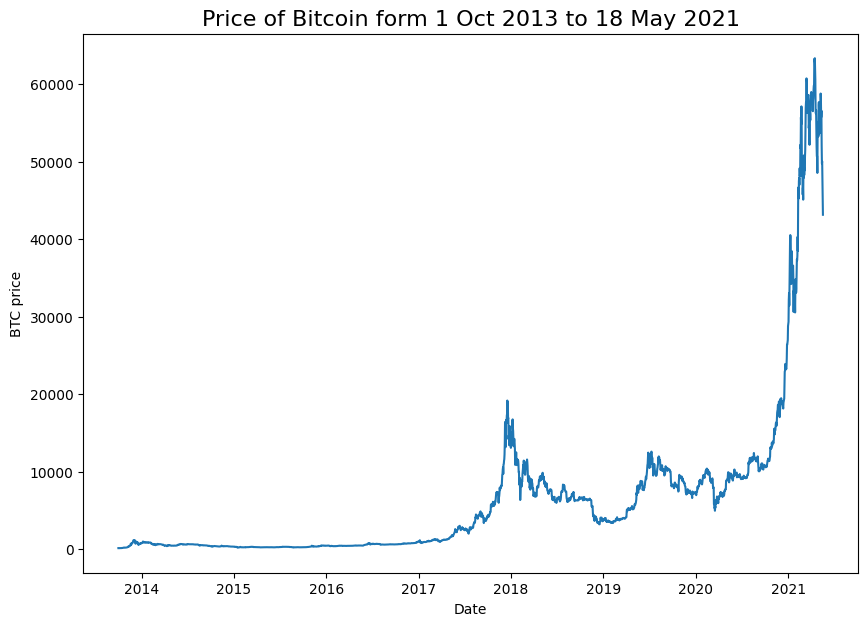

In [8]:
# plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC price")
plt.title("Price of Bitcoin form 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.xlabel("Date")

## Format data part 1 : Create train and test sets of our time series data

In [9]:
### Creatin train and test sets wring way
timesteps = bitcoin_prices.index.to_numpy()
price = bitcoin_prices["Price"].to_numpy()

timesteps[:10],price[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
split_size = int(0.8*len(price)) # 80% train , 20% test

# create train datasplits
X_train,y_train = timesteps[:split_size],price[:split_size]

# crate test datasplits
X_test,y_test = timesteps[split_size:] , price[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

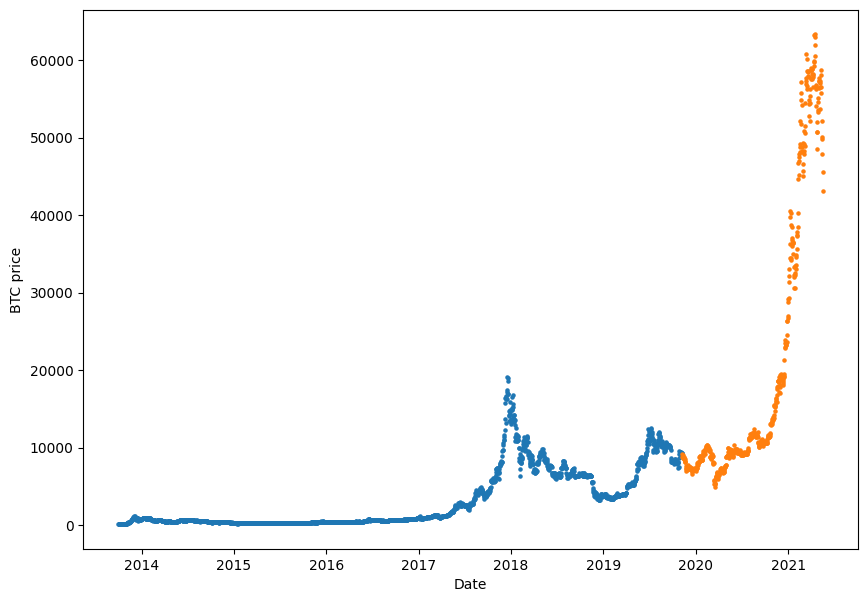

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train_data")
plt.scatter(X_test,y_test,s=5,label="Test_data")
plt.ylabel("BTC price")
plt.xlabel("Date")
plt.show();

## Creating a plot function

In [12]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  """
  plots timesteps(a series of points in time) against the value (a series of values across timestpes)

  Parameters
  -----------
  timesteps : array of timesteps values
  values : array of values across tiem
  start : where to start the plot
  end : where to end the plot
  label : label to show on plot of values
  """
  # plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


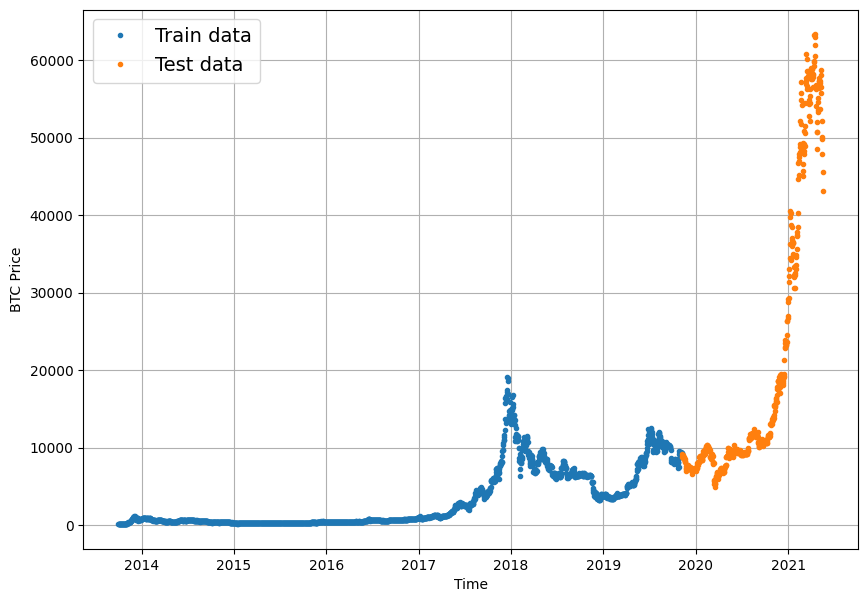

In [13]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling 
Modelling expermients

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

## Model 0 : Naive Baseline model

$$\hat{y}_{t} = y_{t-1}$$ 

In English: 
> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep).


In [14]:
y_test[-5:-1]

array([49764.1320816 , 50032.69313676, 47885.62525472, 45604.61575361])

In [15]:
# creating model
naive_forecast = y_test[:-1]

naive_forecast[:10] , naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [16]:
y_test[:10] == naive_forecast[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

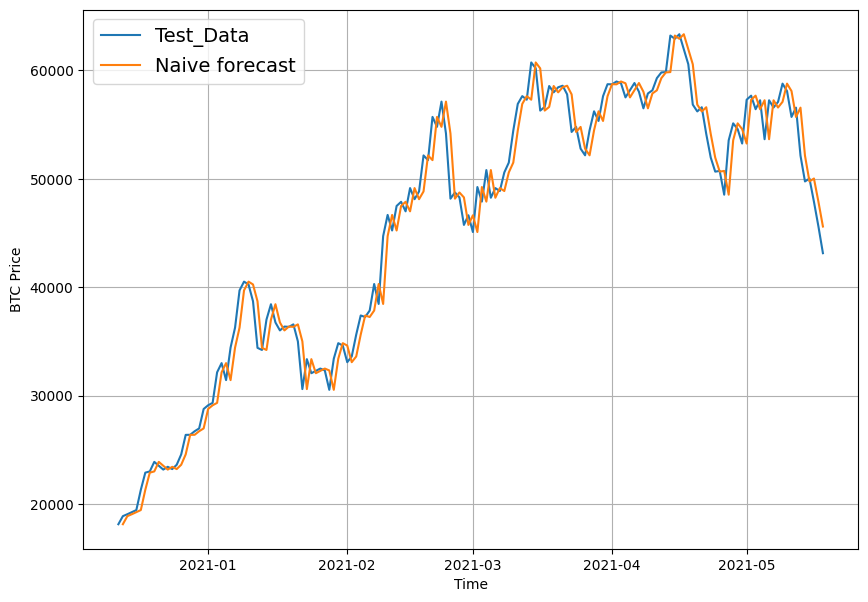

In [17]:
# plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(X_train,y_train,label="Train_Data")
plot_time_series(X_test,y_test,start=400,format="-",label="Test_Data")
plot_time_series(X_test[1:],naive_forecast,start=400,label="Naive forecast",format="-")

## Evaluating a time series Model

In [18]:

import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
baseline_results = evaluate_preds(y_true = y_test[1:],
                    y_pred = naive_forecast)
baseline_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Fomat data part 2 : windowing our dataset

windowing our time series data turns it into a supervise learning problem

In [23]:
# what basically we are trying is with window size of 7
print(f"We want to use : {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [24]:
# global variables for window and horizon size
HORIZON = 1 # predict next day
WINDOW_SIZE = 7

In [25]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
# test our function
test_window,test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


write a function which:
1. Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`
2. Uses NumPy indexing to create a 2D of multiple window steps, for example: 
```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon


In [27]:
## Create function to make view numpy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels
  

In [28]:
full_windows,full_labels = make_windows(price,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [29]:
# view first 3 windows / labels
for i in range(3):
  print(f"Window:{full_windows[i-3]}--> label: {full_labels[i-3]}")

Window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]--> label: [47885.62525472]
Window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]--> label: [45604.61575361]
Window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]--> label: [43144.47129086]


## Turning windows into train and test

In [30]:
## Make the train/test split
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, train_labels,test_windows,test_labels

In [31]:
# create train and test windows 
train_windows,train_labels,test_windows,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [32]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [33]:
## check to see if train labels are same (bofore and afer window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

## Making Modelling Checkpoint

In [34]:
import os
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                           verbose=0,
                                            monitor = "val_loss",
                                           save_best_only=True)


## Model 1 : Dense Model (W=7,H=1)

* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

In [35]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for as reproducible results as possible
tf.random.set_seed(42)

# model construction
model_1 = tf.keras.Sequential([
    layers.Dense(128,"relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

# compile model
model_1.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

early_stopping  = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=0,mode="min",patience=3)

# fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data = (test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1240.7188 - mae: 1240.7188 - mse: 4515282.5000   

18/18 [==============================] - 7s 75ms/step - loss: 937.9019 - mae: 937.9019 - mse: 3201070.0000 - val_loss: 2388.7581 - val_mae: 2388.7581 - val_mse: 14024898.0000
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 296.9053 - mae: 296.9053 - mse: 396518.6562

18/18 [==============================] - 1s 52ms/step - loss: 281.2528 - mae: 281.2528 - mse: 350150.3750 - val_loss: 1205.1229 - val_mae: 1205.1229 - val_mse: 4182939.2500
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 194.3499 - mae: 194.3499 - mse: 190395.5781

18/18 [==============================] - 1s 31ms/step - loss: 194.3499 - mae: 194.3499 - mse: 190395.5781 - val_loss: 1147.5212 - val_mae: 1147.5212 - val_mse: 3874494.5000
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 184.5760 - mae: 184.5760 - mse: 181532.0469

18/18 [==============================] - 1s 35ms/step - loss: 183.9888 - mae: 183.9888 - mse: 178465.4844 - val_loss: 1006.3839 - val_mae: 1006.3839 - val_mse: 3342868.0000
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 177.8740 - mae: 177.8740 - mse: 168843.7656

18/18 [==============================] - 1s 33ms/step - loss: 175.9378 - mae: 175.9378 - mse: 166063.5625 - val_loss: 969.5951 - val_mae: 969.5951 - val_mse: 3090314.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2323 - mae: 129.2323 - mse: 62526.0781

18/18 [==============================] - 1s 32ms/step - loss: 170.1260 - mae: 170.1260 - mse: 155018.0938 - val_loss: 933.4623 - val_mae: 933.4623 - val_mse: 2956457.2500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 207.9410 - mae: 207.9410 - mse: 306558.4688

18/18 [==============================] - 1s 33ms/step - loss: 163.1405 - mae: 163.1405 - mse: 145226.0156 - val_loss: 925.9396 - val_mae: 925.9396 - val_mse: 2756978.7500
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 159.6695 - mae: 159.6695 - mse: 138673.1875

18/18 [==============================] - 1s 32ms/step - loss: 159.6695 - mae: 159.6695 - mse: 138673.1875 - val_loss: 872.0188 - val_mae: 872.0188 - val_mse: 2585492.7500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 156.7532 - mae: 156.7532 - mse: 134917.0156 - val_loss: 892.4315 - val_mae: 892.4315 - val_mse: 2502988.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 164.9287 - mae: 164.9287 - mse: 178238.9062

18/18 [==============================] - 1s 33ms/step - loss: 151.6023 - mae: 151.6023 - mse: 127101.5391 - val_loss: 828.0010 - val_mae: 828.0010 - val_mse: 2334816.7500
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 148.0664 - mae: 148.0664 - mse: 122137.8047

18/18 [==============================] - 1s 32ms/step - loss: 146.8876 - mae: 146.8876 - mse: 120023.6797 - val_loss: 813.6668 - val_mae: 813.6668 - val_mse: 2201639.2500
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 142.2842 - mae: 142.2842 - mse: 112840.6562

18/18 [==============================] - 1s 33ms/step - loss: 143.3549 - mae: 143.3549 - mse: 114760.7578 - val_loss: 810.4628 - val_mae: 810.4628 - val_mse: 2130761.2500
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 142.6645 - mae: 142.6645 - mse: 112759.0391 - val_loss: 857.2802 - val_mae: 857.2802 - val_mse: 2201392.0000
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 138.8176 - mae: 138.8176 - mse: 106531.1641

18/18 [==============================] - 1s 32ms/step - loss: 141.7861 - mae: 141.7861 - mse: 108778.6250 - val_loss: 801.1708 - val_mae: 801.1709 - val_mse: 2022349.8750
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 136.4451 - mae: 136.4451 - mse: 104359.3047

18/18 [==============================] - 1s 31ms/step - loss: 136.4451 - mae: 136.4451 - mse: 104359.3047 - val_loss: 747.3175 - val_mae: 747.3175 - val_mse: 1854391.7500
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 131.9152 - mae: 131.9152 - mse: 98941.2578

18/18 [==============================] - 1s 33ms/step - loss: 131.9152 - mae: 131.9152 - mse: 98941.2578 - val_loss: 744.8871 - val_mae: 744.8871 - val_mse: 1810642.3750
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6010 - mae: 130.6010 - mse: 97217.7344 - val_loss: 751.8444 - val_mae: 751.8444 - val_mse: 1802414.0000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 142.9997 - mae: 142.9997 - mse: 97146.6328

18/18 [==============================] - 1s 31ms/step - loss: 129.8145 - mae: 129.8145 - mse: 96164.5234 - val_loss: 721.5012 - val_mae: 721.5012 - val_mse: 1701445.7500
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2739 - mae: 127.2739 - mse: 92125.1328 - val_loss: 759.9888 - val_mae: 759.9888 - val_mse: 1780366.5000
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 125.7697 - mae: 125.7697 - mse: 90399.6016 

18/18 [==============================] - 1s 33ms/step - loss: 125.6503 - mae: 125.6503 - mse: 90383.2422 - val_loss: 706.6976 - val_mae: 706.6976 - val_mse: 1722764.3750
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 172.2316 - mae: 172.2316 - mse: 131240.0469

18/18 [==============================] - 1s 46ms/step - loss: 128.3398 - mae: 128.3398 - mse: 94212.1328 - val_loss: 688.8860 - val_mae: 688.8860 - val_mse: 1572939.2500
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 123.2700 - mae: 123.2700 - mse: 87764.5000 

18/18 [==============================] - 1s 35ms/step - loss: 123.2700 - mae: 123.2700 - mse: 87764.5000 - val_loss: 688.6972 - val_mae: 688.6972 - val_mse: 1557621.8750
Epoch 23/100
18/18 [==============================] - 0s 11ms/step - loss: 125.2780 - mae: 125.2780 - mse: 89299.7656 - val_loss: 694.7348 - val_mae: 694.7348 - val_mse: 1564056.5000
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 122.9813 - mae: 122.9813 - mse: 88240.3984

18/18 [==============================] - 1s 45ms/step - loss: 121.1875 - mae: 121.1875 - mse: 83891.7812 - val_loss: 671.9939 - val_mae: 671.9939 - val_mse: 1502725.7500
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 119.5349 - mae: 119.5349 - mse: 82745.7578 - val_loss: 675.3644 - val_mae: 675.3644 - val_mse: 1577685.3750
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 125.2753 - mae: 125.2753 - mse: 84937.1875 - val_loss: 727.1897 - val_mae: 727.1898 - val_mse: 1752590.5000
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 123.0076 - mae: 123.0076 - mse: 86645.4844 - val_loss: 674.9625 - val_mae: 674.9625 - val_mse: 1567217.7500
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 118.0870 - mae: 118.0870 - mse: 78862.7891

18/18 [==============================] - 1s 47ms/step - loss: 118.3128 - mae: 118.3128 - mse: 81744.1328 - val_loss: 643.2693 - val_mae: 643.2693 - val_mse: 1442120.0000
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 119.4948 - mae: 119.4948 - mse: 82180.3516 - val_loss: 673.8559 - val_mae: 673.8559 - val_mse: 1478430.6250
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 122.8164 - mae: 122.8164 - mse: 83389.0391 - val_loss: 729.0346 - val_mae: 729.0346 - val_mse: 1614178.5000
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 128.0962 - mae: 128.0962 - mse: 88105.9375 - val_loss: 825.7172 - val_mae: 825.7172 - val_mse: 1900143.8750
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 144.9433 - mae: 144.9433 - mse: 96271.1719

18/18 [==============================] - 1s 31ms/step - loss: 130.3284 - mae: 130.3284 - mse: 85195.3359 - val_loss: 627.2283 - val_mae: 627.2283 - val_mse: 1376263.3750
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7716 - mae: 121.7716 - mse: 78706.7656 - val_loss: 638.3679 - val_mae: 638.3679 - val_mse: 1418708.6250
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9804 - mae: 129.9804 - mse: 131368.2188

18/18 [==============================] - 1s 31ms/step - loss: 114.3880 - mae: 114.3880 - mse: 77657.1562 - val_loss: 618.8769 - val_mae: 618.8769 - val_mse: 1338172.3750
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 104.6646 - mae: 104.6646 - mse: 58751.3125

18/18 [==============================] - 1s 31ms/step - loss: 113.3468 - mae: 113.3468 - mse: 77330.4531 - val_loss: 614.4803 - val_mae: 614.4803 - val_mse: 1321599.7500
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4121 - mae: 116.4121 - mse: 77341.7578 - val_loss: 699.6948 - val_mae: 699.6948 - val_mse: 1518526.0000
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 148.4799 - mae: 148.4799 - mse: 112922.4609

18/18 [==============================] - 1s 31ms/step - loss: 113.7018 - mae: 113.7018 - mse: 74831.5859 - val_loss: 609.1846 - val_mae: 609.1846 - val_mse: 1302760.5000
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3156 - mae: 112.3156 - mse: 75429.1797 - val_loss: 618.9445 - val_mae: 618.9445 - val_mse: 1342977.8750
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6948 - mae: 114.6948 - mse: 75763.1953 - val_loss: 678.8313 - val_mae: 678.8313 - val_mse: 1518631.5000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4624 - mae: 114.4624 - mse: 102340.8047

18/18 [==============================] - 1s 33ms/step - loss: 112.4482 - mae: 112.4482 - mse: 76238.4531 - val_loss: 602.7349 - val_mae: 602.7349 - val_mse: 1280839.0000
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9194 - mae: 110.9194 - mse: 74458.7891 - val_loss: 620.2952 - val_mae: 620.2952 - val_mse: 1341605.1250
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 108.5564 - mae: 108.5564 - mse: 60757.1680

18/18 [==============================] - 1s 31ms/step - loss: 114.8152 - mae: 114.8152 - mse: 77501.9922 - val_loss: 597.1803 - val_mae: 597.1803 - val_mse: 1267116.3750
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9108 - mae: 109.9108 - mse: 72299.9531 - val_loss: 603.6016 - val_mae: 603.6016 - val_mse: 1289575.3750
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 64.7839 - mae: 64.7839 - mse: 15515.2197

18/18 [==============================] - 1s 31ms/step - loss: 110.7981 - mae: 110.7981 - mse: 72643.1797 - val_loss: 595.0572 - val_mae: 595.0572 - val_mse: 1260385.7500
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4005 - mae: 110.4005 - mse: 74273.8125 - val_loss: 597.0302 - val_mae: 597.0302 - val_mse: 1258820.6250
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 111.6445 - mae: 111.6445 - mse: 74212.3281

18/18 [==============================] - 1s 31ms/step - loss: 111.6445 - mae: 111.6445 - mse: 74212.3281 - val_loss: 594.5570 - val_mae: 594.5570 - val_mse: 1260658.3750
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6877 - mae: 113.6877 - mse: 76367.7109 - val_loss: 678.4072 - val_mae: 678.4072 - val_mse: 1439336.0000
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4653 - mae: 113.4653 - mse: 73590.3516 - val_loss: 682.1651 - val_mae: 682.1651 - val_mse: 1450056.6250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 175.3371 - mae: 175.3371 - mse: 129197.3438

18/18 [==============================] - 1s 32ms/step - loss: 113.0997 - mae: 113.0997 - mse: 73278.5781 - val_loss: 590.2390 - val_mae: 590.2390 - val_mse: 1239822.2500
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4069 - mae: 109.4069 - mse: 72372.0000 - val_loss: 613.4861 - val_mae: 613.4861 - val_mse: 1307302.2500
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 88.7371 - mae: 88.7371 - mse: 48330.1523

18/18 [==============================] - 1s 32ms/step - loss: 108.9360 - mae: 108.9360 - mse: 71068.1016 - val_loss: 588.8729 - val_mae: 588.8729 - val_mse: 1232538.7500
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9834 - mae: 109.9834 - mse: 73458.7031 - val_loss: 604.6687 - val_mae: 604.6687 - val_mse: 1281235.3750
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 111.3389 - mae: 111.3389 - mse: 73594.6016

18/18 [==============================] - 1s 32ms/step - loss: 111.3389 - mae: 111.3389 - mse: 73594.6016 - val_loss: 586.5209 - val_mae: 586.5209 - val_mse: 1224847.3750
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6190 - mae: 113.6190 - mse: 74796.5625 - val_loss: 630.8054 - val_mae: 630.8054 - val_mse: 1316380.1250
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6995 - mae: 109.6995 - mse: 72301.7656 - val_loss: 590.9045 - val_mae: 590.9045 - val_mse: 1243462.1250
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6479 - mae: 108.6479 - mse: 71827.7188 - val_loss: 726.3875 - val_mae: 726.3875 - val_mse: 1623429.0000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1642 - mae: 119.1642 - mse: 78008.0781 - val_loss: 664.7789 - val_mae: 664.7789 - val_mse: 1434776.0000
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 90.2045 - mae: 90.2045 - mse: 30

18/18 [==============================] - 1s 48ms/step - loss: 111.5156 - mae: 111.5156 - mse: 71792.7812 - val_loss: 580.9578 - val_mae: 580.9578 - val_mse: 1216721.8750
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6779 - mae: 107.6779 - mse: 70709.4141 - val_loss: 584.3633 - val_mae: 584.3633 - val_mse: 1224900.3750
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6537 - mae: 107.6537 - mse: 71648.6953 - val_loss: 614.4316 - val_mae: 614.4316 - val_mse: 1271004.1250
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4763 - mae: 108.4763 - mse: 72044.1250 - val_loss: 591.5024 - val_mae: 591.5024 - val_mse: 1225169.5000
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2725 - mae: 108.2725 - mse: 69952.1562 - val_loss: 584.0571 - val_mae: 584.0571 - val_mse: 1220266.6250
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7112 - mae: 107.7112 - m

18/18 [==============================] - 1s 33ms/step - loss: 109.8926 - mae: 109.8926 - mse: 72073.1562 - val_loss: 579.5518 - val_mae: 579.5518 - val_mse: 1200134.5000
Epoch 66/100
18/18 [==============================] - 0s 11ms/step - loss: 108.4087 - mae: 108.4087 - mse: 69878.1328 - val_loss: 579.7639 - val_mae: 579.7639 - val_mse: 1207724.3750
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 105.9029 - mae: 105.9029 - mse: 68564.7344 - val_loss: 604.2229 - val_mae: 604.2229 - val_mse: 1268840.2500
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4254 - mae: 111.4254 - mse: 69105.2109 - val_loss: 698.4280 - val_mae: 698.4280 - val_mse: 1519016.1250
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 122.5949 - mae: 122.5949 - mse: 79648.4766 - val_loss: 669.4568 - val_mae: 669.4568 - val_mse: 1427161.3750
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 118.1639 - mae: 118.1639 - 

18/18 [==============================] - 1s 46ms/step - loss: 108.0214 - mae: 108.0214 - mse: 69955.1016 - val_loss: 575.3691 - val_mae: 575.3691 - val_mse: 1189877.6250
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 107.4635 - mae: 107.4635 - mse: 69877.6406 - val_loss: 604.2703 - val_mae: 604.2703 - val_mse: 1265555.6250
Epoch 74/100
18/18 [==============================] - 0s 11ms/step - loss: 106.5706 - mae: 106.5706 - mse: 70016.0391 - val_loss: 582.8507 - val_mae: 582.8507 - val_mse: 1211536.1250
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 107.0594 - mae: 107.0594 - mse: 69481.7109 - val_loss: 606.6231 - val_mae: 606.6231 - val_mse: 1248320.0000
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6147 - mae: 107.6147 - mse: 69732.7734 - val_loss: 581.2782 - val_mae: 581.2782 - val_mse: 1206802.1250
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1538 - mae: 109.1538 - 

18/18 [==============================] - 1s 32ms/step - loss: 106.6395 - mae: 106.6395 - mse: 70399.1562 - val_loss: 572.2618 - val_mae: 572.2618 - val_mse: 1179592.2500
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3766 - mae: 105.3766 - mse: 67558.9609 - val_loss: 575.5597 - val_mae: 575.5597 - val_mse: 1180181.6250
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1706 - mae: 106.1706 - mse: 66897.4062 - val_loss: 622.8050 - val_mae: 622.8050 - val_mse: 1273044.8750
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2991 - mae: 111.2991 - mse: 71043.6094 - val_loss: 609.1594 - val_mae: 609.1594 - val_mse: 1270294.7500
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8666 - mae: 106.8666 - mse: 69407.0469 - val_loss: 578.0121 - val_mae: 578.0121 - val_mse: 1195432.6250
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4845 - mae: 112.4845 - m

In [36]:
baseline_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [37]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 642.9835 - mae: 642.9835 - mse: 1317949.5000


[642.9835205078125, 642.9835205078125, 1317949.5]

In [38]:
# load th saved best performing model and eavluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 572.2617 - mae: 572.2617 - mse: 1179592.2500


[572.26171875, 572.26171875, 1179592.25]

## Making forecasts with a model (on the test dataset)

1. Takes in a trained model (just like `model_1`)
2. Takes in some input data (just like the data the model was trained on) 
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [39]:
def make_preds(model,input_data):
  """
  Uses model to make prediction on input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [40]:
# make preds
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8860.734, 8785.543, 9036.31 , 8783.45 , 8714.852, 8751.447,
        8677.273, 8517.977, 8454.069, 8529.336], dtype=float32)>)

In [41]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 572.2618,
 'mse': 1179592.1,
 'rmse': 1086.0903,
 'mape': 2.5665255,
 'mase': 1.0053054}

In [42]:
baseline_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

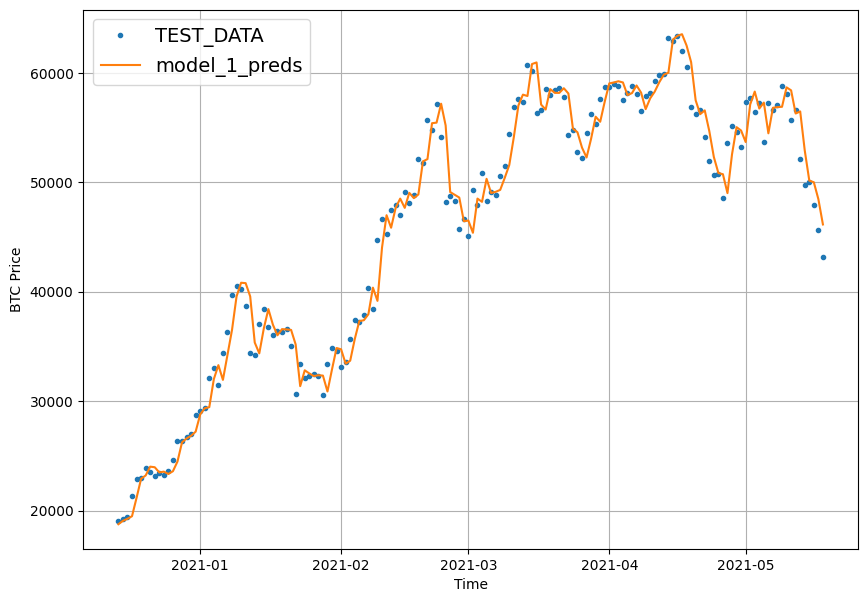

In [43]:
# lets plot our model_1 predictions
offset = 400
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,0],start=offset,label="TEST_DATA")
plot_time_series(timesteps=X_test[-len(test_windows):],values = model_1_preds,format="-",start=offset,label="model_1_preds",)

## Model 2: Dense(window=30,horizon=1)

In [44]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # using 30 timesteps in past

In [45]:
# make windowed data with appropraite horizon and window size
full_window,full_labels = make_windows(price,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2757)

In [46]:
train_windows,train_labels,test_window,test_labels = make_train_test_splits(windows=full_windows,
                                                                           labels=full_labels,
                                                                           test_split=0.2)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 533)

In [47]:
train_windows[:2],train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ]]),
 array([[196.02499],
        [198.04883]]))

In [48]:
# creating model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_2_dense")

# compile
model_2.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_window,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1401.2251 - mae: 1401.2251 - mse: 6676656.5000  

ValueError: ignored

In [ ]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

In [ ]:
# get forecasted predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

In [ ]:
model_1_results

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# account for test windpw offset while plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,0],start=offset,label="test data")
plot_time_series(timesteps = X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="model_2_preds")

## Model 3 : Dense (window=30 , horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows , full_labels = make_windows(price,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

In [ ]:
train_windows,train_labels,test_windows,test_labels = make_train_test_splits(full_windows,
                                                                            full_labels,
                                                                            0.2)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

In [ ]:
## creating the model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

In [ ]:
model_3_preds = make_preds(model_3,
                           test_windows)


In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_3_preds)
model_3_results

In [ ]:
model_2_results

In [ ]:
# creating function to deal with multiple horizon size
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons ,we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results["mae"].ndim

In [ ]:
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_3_preds)
model_3_results

In [ ]:
#ploting our preds
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test_data")
plot_time_series(X_test[-len(test_windows):],tf.reduce_mean(model_3_preds,axis=1),start=offset,format="-",label="model_3_preds")

In [ ]:
## Which Of our models performing well
pd.DataFrame({"naive": baseline_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model_4 : Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# getting windowed data
full_windows,full_labels = make_windows(price,WINDOW_SIZE,HORIZON)
len(full_windows),len(full_labels)

In [ ]:
# create train and test splits
train_windows,train_labels,test_windows,test_labels = make_train_test_splits(full_windows,
                                                                             full_labels,
                                                                             test_split=0.2)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

The Conv1D layer in TensorFlow takes an input of: `(batch_size, timesteps, input_dim)`.


In [ ]:
train_windows[0].shape

In [ ]:
# before we pass our data to Cov1D layer , we have to reshape it order to maek sure it works
x = tf.constant(train_windows[0])
x 

In [ ]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x,axis=1)) # adds an extra layer

In [ ]:
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

In [ ]:
# Creatr Conv1D
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_Conv1Di")

# compile
model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mse","mae"])

# fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1Di/")
model_4.evaluate(test_windows,test_labels)

In [ ]:
model_4_preds = make_preds(model_4,
                           test_windows)

In [ ]:
model_4_preds[:2]

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results


In [ ]:
model_2_results

In [ ]:
#ploting our preds
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],format="-",start=offset,label="test_data")
plot_time_series(X_test[-len(test_windows):],model_4_preds,start=offset,format="-",label="model_4_preds")

## Model_5 : RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x,axis=1))(inputs)
#x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128,"relu")(x)
#x = layers.Dense(32,"relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs,output,name="model_5_LSTM")

# compile
model_5.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mse","mae"])

# fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows,test_labels)

In [ ]:
model_5_preds = make_preds(model_5,
                           test_windows)

In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],format="-",start=offset,label="test_data")
plot_time_series(X_test[-len(test_windows):],model_5_preds,start=offset,format="-",label="model_5_preds")

## Make a multivariate time series dataset

In [52]:
# making multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [53]:
# lets add the bitcoin halving event in out dataset
block_reward_1 = 50 # 3 jab 2009 # this isnt there in our dataset
block_reward_2 = 25 # 8 nov 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

# block rewards dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [54]:
# adding block reward column
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2414)

In [55]:
## add block reward 
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_rewards"] = None

## add values
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] =  block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

# head data
bitcoin_prices_block.tail()

,Price,block_rewards
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


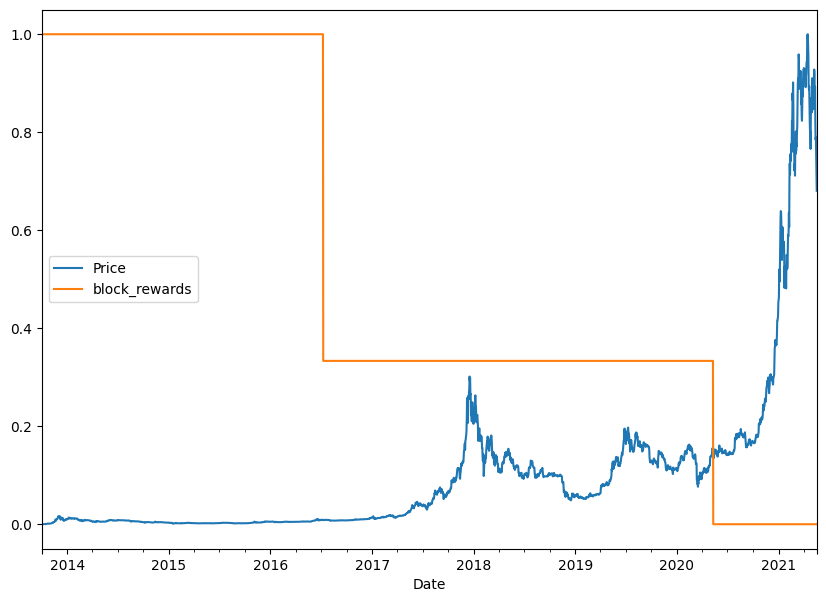

In [56]:
#plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_rewards"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## making a windowed data with pandas

In [57]:
# setup data set hyperparams
HORIZON = 1
WINDOW_SIZE = 7

In [58]:

# making a cpy
bitcoin_prices_windowed = bitcoin_prices_block.copy()

## add winddowed column
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_rewards,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [59]:
# cretae X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_rewards,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [60]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [61]:
# make train and test split using indexing
split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size] , y[:split_size]
X_test,y_test = X[split_size:] , y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [62]:
X_train,y_train,X_test,y_test

(            block_rewards      Price+1      Price+2      Price+3      Price+4  \
 Date                                                                            
 2013-10-08           25.0   121.794998   120.655327   121.338661   118.674660   
 2013-10-09           25.0   123.032997   121.794998   120.655327   121.338661   
 2013-10-10           25.0   124.049004   123.032997   121.794998   120.655327   
 2013-10-11           25.0   125.961159   124.049004   123.032997   121.794998   
 2013-10-12           25.0   125.279663   125.961159   124.049004   123.032997   
 ...                   ...          ...          ...          ...          ...   
 2019-11-05           12.5  9202.415039  9290.896484  9197.632812  9131.410156   
 2019-11-06           12.5  9369.627930  9202.415039  9290.896484  9197.632812   
 2019-11-07           12.5  9326.599609  9369.627930  9202.415039  9290.896484   
 2019-11-08           12.5  9335.751953  9326.599609  9369.627930  9202.415039   
 2019-11-09     

Model 6 :Dense(Multivariate time series)

In [ ]:
tf.random.set_seed(42)

# multivariate model
model_6 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,"relu"),
    layers.Dense(HORIZON)
],name="model_6_dense_multivariate")


# compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit
model_6.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# evaluate the model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate/")
model_6.evaluate(X_test,y_test)

In [ ]:
model_6_preds = make_preds(model_6,
                           X_test)

In [ ]:
model_6_results = evaluate_preds(tf.squeeze(y_test),
                                 model_6_preds)
model_6_results

In [ ]:
baseline_results

## Model 7 : N-Beats Algorithm

### Building and Testing N-BEATS block layer

In [63]:
import tensorflow as tf

In [64]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs) : #  # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # block contains stack of 4 fully connected layer with each activated with relu activation
    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    # output of block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear",name="theta")


  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # output the backcast and forecast from theta
    backcast,forecast = theta[:,:self.input_size],theta[:,-self.horizon:]
    return backcast , forecast

testing our N-Beats block

In [65]:
# dummy Nbeats block layer to represent inouts and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4) 

In [66]:
# create dummy inuts
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)# input shape to the model
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [67]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer 
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.22580121  0.43080032  0.4203926   0.7476219   0.35333577 -0.4945442
 -0.14513806]
Forecast: -0.41045668721199036


## Preaparing data for the N-Beats algorithm

In [68]:
HORIZON = 1
WINDOW = 7

In [69]:
# creating N-Beats data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [70]:
# Adding windowed column
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [71]:
# make features an labels
X = bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# make train test splits
split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [72]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [73]:
train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters 

hyperparameters are taken from Figure 1 and Table 18/Appendix D of the [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf).

In [74]:
# Hyperparameters
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE*HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Residual connections
N-Beats algorithm uses double residual stacking to help train its deeper archituecture

In [75]:
# Trying layers for Doubly residual stacking
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building N-Beats

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional) for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using [`tf.keras.Model()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf))
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * [`tf.keras.callbacks.EarlyStopping()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using `restore_best_weights=True` (this'll prevent the model from training for loooongggggg period of time without improvement)
  * [`tf.keras.callbacks.ReduceLROnPlateau()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

In [ ]:
model_7.evaluate(test_dataset)

In [ ]:
# making preds
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

In [ ]:
model_7_results = evaluate_preds(y_test,
                                 model_7_preds)
model_7_results

In [ ]:
model_7.save(model_7.name)

In [ ]:
baseline_results

### Plotting the N-BEATS architecture 

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Model 8: Ensemble Model (Stacking different models together)

In [ ]:
HORIZON,WINDOW_SIZE

### Constructing and fitting and  emsemble of models (using different loss functions)

In [76]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models
    
  

In [ ]:
%%time
# get list of trained emsemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

In [ ]:
len(ensemble_models)

In [ ]:
## make predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# creating list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_results = evaluate_preds(y_test,
                                  ensemble_preds)
ensemble_results

In [ ]:
ensemble_results = evaluate_preds(y_test,
                                  tf.reduce_mean(ensemble_preds,axis=0))
ensemble_results

In [ ]:
ensemble_results = evaluate_preds(y_test,
                                  np.median(ensemble_preds,axis=0))
ensemble_results

## Prediction Interval


One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method: 
1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
# get median / mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds,axis=0)

# plot the median of our ensemble preds alogn with the prediction interval
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label="Test Data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# to plot upper and loxer bond
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                  (upper)[offset:],label="Prediction Intervals")
plt.legend(loc="upper left",fontsize=14)

## Model 9 : Training full historical data to make prediction into th e future

In [77]:
bitcoin_prices_windowed.head()

,Price,block_rewards,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [78]:
bitcoin_prices_windowed.tail()

,Price,block_rewards,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [79]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_rewards"],axis=1).to_numpy()
# get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all),len(y_all)

(2780, 2780)

In [80]:
# Turn data into effificent running datset
feature_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# combining 
dataset_all = tf.data.Dataset.zip((feature_dataset_all,labels_dataset_all))

# batch anf prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [83]:
tf.random.set_seed(42)
                   
# creating model 9
model_9 = tf.keras.Sequential([
    layers.Dense(128,"relu"),
    layers.Dense(128,"relu"),
    layers.Dense(HORIZON)
],name = "model_9_futurepred")
                   
# compiling
model_9.compile(loss = "mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# fit the model
model_9.fit(dataset_all,
            epochs=100,
            verbose=1,
            callbacks=[create_model_checkpoint(model_name=model_9.name)])

Epoch 1/100
1/3 [=========>....................] - ETA: 2s - loss: 475.5599 - mae: 475.5599 - mse: 267952.4688

3/3 [==============================] - 1s 10ms/step - loss: 5692.5757 - mae: 5692.5757 - mse: 114095608.0000
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 299.1219 - mae: 299.1219 - mse: 106581.7188

3/3 [==============================] - 0s 7ms/step - loss: 3388.4490 - mae: 3388.4490 - mse: 39712160.0000
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 149.6926 - mae: 149.6926 - mse: 27827.6758

3/3 [==============================] - 0s 8ms/step - loss: 1068.1322 - mae: 1068.1322 - mse: 3919821.2500
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 25.1016 - mae: 25.1016 - mse: 2029.6675

3/3 [==============================] - 0s 8ms/step - loss: 1263.0688 - mae: 1263.0688 - mse: 8416325.0000
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 107.5375 - mae: 107.5375 - mse: 15613.7090

3/3 [==============================] - 0s 8ms/step - loss: 1708.3348 - mae: 1708.3348 - mse: 12208339.0000
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 102.6120 - mae: 102.6120 - mse: 14304.8916

3/3 [==============================] - 0s 8ms/step - loss: 1141.9603 - mae: 1141.9603 - mse: 5444094.5000
Epoch 7/100
1/3 [=========>....................] - ETA: 0s - loss: 51.8907 - mae: 51.8907 - mse: 4499.1973

3/3 [==============================] - 0s 7ms/step - loss: 412.3340 - mae: 412.3340 - mse: 980030.2500
Epoch 8/100
1/3 [=========>....................] - ETA: 0s - loss: 28.7252 - mae: 28.7252 - mse: 2204.1738

3/3 [==============================] - 0s 8ms/step - loss: 762.1096 - mae: 762.1096 - mse: 3066067.0000
Epoch 9/100
1/3 [=========>....................] - ETA: 0s - loss: 51.1425 - mae: 51.1425 - mse: 4371.7920

3/3 [==============================] - 0s 10ms/step - loss: 756.7937 - mae: 756.7937 - mse: 2739954.2500
Epoch 10/100
1/3 [=========>....................] - ETA: 0s - loss: 36.1197 - mae: 36.1197 - mse: 2776.2017

3/3 [==============================] - 0s 9ms/step - loss: 403.2613 - mae: 403.2613 - mse: 968013.5625
Epoch 11/100
1/3 [=========>....................] - ETA: 0s - loss: 25.5942 - mae: 25.5942 - mse: 1947.7771

3/3 [==============================] - 0s 9ms/step - loss: 547.1749 - mae: 547.1749 - mse: 1821659.7500
Epoch 12/100
1/3 [=========>....................] - ETA: 0s - loss: 42.7918 - mae: 42.7918 - mse: 3373.6006

3/3 [==============================] - 0s 10ms/step - loss: 565.0180 - mae: 565.0180 - mse: 1752163.8750
Epoch 13/100
1/3 [=========>....................] - ETA: 0s - loss: 32.3939 - mae: 32.3939 - mse: 2387.8462

3/3 [==============================] - 0s 7ms/step - loss: 373.1768 - mae: 373.1768 - mse: 889060.0000
Epoch 14/100
1/3 [=========>....................] - ETA: 0s - loss: 22.1662 - mae: 22.1662 - mse: 1758.0813

3/3 [==============================] - 0s 8ms/step - loss: 464.7582 - mae: 464.7582 - mse: 1273847.1250
Epoch 15/100
1/3 [=========>....................] - ETA: 0s - loss: 26.8514 - mae: 26.8514 - mse: 2007.7330

3/3 [==============================] - 0s 8ms/step - loss: 408.2148 - mae: 408.2148 - mse: 985431.9375
Epoch 16/100
1/3 [=========>....................] - ETA: 0s - loss: 20.7354 - mae: 20.7354 - mse: 1640.7321

3/3 [==============================] - 0s 9ms/step - loss: 369.7745 - mae: 369.7745 - mse: 906512.1875
Epoch 17/100
1/3 [=========>....................] - ETA: 0s - loss: 26.5707 - mae: 26.5707 - mse: 1894.1796

3/3 [==============================] - 0s 9ms/step - loss: 380.3350 - mae: 380.3350 - mse: 906404.0000
Epoch 18/100
1/3 [=========>....................] - ETA: 0s - loss: 22.4601 - mae: 22.4601 - mse: 1632.3994

3/3 [==============================] - 0s 11ms/step - loss: 341.2159 - mae: 341.2159 - mse: 759992.1875
Epoch 19/100
1/3 [=========>....................] - ETA: 0s - loss: 20.0668 - mae: 20.0668 - mse: 1513.7406

3/3 [==============================] - 0s 17ms/step - loss: 343.6202 - mae: 343.6202 - mse: 751405.1875
Epoch 20/100
1/3 [=========>....................] - ETA: 0s - loss: 19.3029 - mae: 19.3029 - mse: 1445.0782

3/3 [==============================] - 0s 13ms/step - loss: 323.4975 - mae: 323.4975 - mse: 702886.4375
Epoch 21/100
1/3 [=========>....................] - ETA: 0s - loss: 21.3117 - mae: 21.3117 - mse: 1482.5873

3/3 [==============================] - 0s 15ms/step - loss: 313.7167 - mae: 313.7167 - mse: 653492.1250
Epoch 22/100
1/3 [=========>....................] - ETA: 0s - loss: 18.5270 - mae: 18.5270 - mse: 1332.9514

3/3 [==============================] - 0s 14ms/step - loss: 319.6648 - mae: 319.6648 - mse: 650847.0625
Epoch 23/100
1/3 [=========>....................] - ETA: 0s - loss: 17.8336 - mae: 17.8336 - mse: 1265.9431

3/3 [==============================] - 0s 14ms/step - loss: 293.8510 - mae: 293.8510 - mse: 589226.3125
Epoch 24/100
1/3 [=========>....................] - ETA: 0s - loss: 19.0992 - mae: 19.0992 - mse: 1275.2887

3/3 [==============================] - 0s 10ms/step - loss: 287.0970 - mae: 287.0970 - mse: 555627.7500
Epoch 25/100
1/3 [=========>....................] - ETA: 0s - loss: 17.1785 - mae: 17.1785 - mse: 1175.0754

3/3 [==============================] - 0s 14ms/step - loss: 282.8829 - mae: 282.8829 - mse: 527727.5625
Epoch 26/100
1/3 [=========>....................] - ETA: 0s - loss: 16.5868 - mae: 16.5868 - mse: 1123.9502

3/3 [==============================] - 0s 12ms/step - loss: 271.1463 - mae: 271.1463 - mse: 504103.0312
Epoch 27/100
1/3 [=========>....................] - ETA: 0s - loss: 17.0715 - mae: 17.0715 - mse: 1110.3944

3/3 [==============================] - 0s 11ms/step - loss: 264.0438 - mae: 264.0438 - mse: 470016.4688
Epoch 28/100
1/3 [=========>....................] - ETA: 0s - loss: 16.0291 - mae: 16.0291 - mse: 1052.7805

3/3 [==============================] - 0s 12ms/step - loss: 258.2943 - mae: 258.2943 - mse: 450750.8125
Epoch 29/100
1/3 [=========>....................] - ETA: 0s - loss: 16.1465 - mae: 16.1465 - mse: 1033.8466

3/3 [==============================] - 0s 10ms/step - loss: 255.5301 - mae: 255.5301 - mse: 447367.5625
Epoch 30/100
1/3 [=========>....................] - ETA: 0s - loss: 15.8203 - mae: 15.8203 - mse: 1001.9079

3/3 [==============================] - 0s 11ms/step - loss: 253.0592 - mae: 253.0592 - mse: 428711.5000
Epoch 31/100
1/3 [=========>....................] - ETA: 0s - loss: 15.5585 - mae: 15.5585 - mse: 974.8806

3/3 [==============================] - 0s 14ms/step - loss: 250.0297 - mae: 250.0297 - mse: 430571.9375
Epoch 32/100
1/3 [=========>....................] - ETA: 0s - loss: 15.4635 - mae: 15.4635 - mse: 956.2408

3/3 [==============================] - 0s 18ms/step - loss: 251.4093 - mae: 251.4093 - mse: 418337.8438
Epoch 33/100
1/3 [=========>....................] - ETA: 0s - loss: 15.2614 - mae: 15.2614 - mse: 936.3232

3/3 [==============================] - 0s 13ms/step - loss: 251.2853 - mae: 251.2853 - mse: 431729.9062
Epoch 34/100
1/3 [=========>....................] - ETA: 0s - loss: 15.1737 - mae: 15.1737 - mse: 922.4852

3/3 [==============================] - 0s 13ms/step - loss: 266.3674 - mae: 266.3674 - mse: 450046.2188
Epoch 35/100
1/3 [=========>....................] - ETA: 0s - loss: 15.0766 - mae: 15.0766 - mse: 910.6711

3/3 [==============================] - 0s 12ms/step - loss: 282.7474 - mae: 282.7474 - mse: 519301.2500
Epoch 36/100
1/3 [=========>....................] - ETA: 0s - loss: 15.7524 - mae: 15.7524 - mse: 927.1500

3/3 [==============================] - 0s 15ms/step - loss: 271.8715 - mae: 271.8715 - mse: 467923.1562
Epoch 37/100
1/3 [=========>....................] - ETA: 0s - loss: 15.1899 - mae: 15.1899 - mse: 899.2747

3/3 [==============================] - 0s 11ms/step - loss: 250.5244 - mae: 250.5244 - mse: 428405.0312
Epoch 38/100
1/3 [=========>....................] - ETA: 0s - loss: 15.2035 - mae: 15.2035 - mse: 898.5791

3/3 [==============================] - 0s 10ms/step - loss: 252.3291 - mae: 252.3291 - mse: 414012.9688
Epoch 39/100
1/3 [=========>....................] - ETA: 0s - loss: 14.8663 - mae: 14.8663 - mse: 882.9243

3/3 [==============================] - 0s 11ms/step - loss: 250.0739 - mae: 250.0739 - mse: 423305.7188
Epoch 40/100
1/3 [=========>....................] - ETA: 0s - loss: 14.9529 - mae: 14.9529 - mse: 882.4671

3/3 [==============================] - 0s 14ms/step - loss: 263.5376 - mae: 263.5376 - mse: 440895.0938
Epoch 41/100
1/3 [=========>....................] - ETA: 0s - loss: 14.8706 - mae: 14.8706 - mse: 875.3069

3/3 [==============================] - 0s 10ms/step - loss: 256.4220 - mae: 256.4220 - mse: 439927.2188
Epoch 42/100
1/3 [=========>....................] - ETA: 0s - loss: 15.1856 - mae: 15.1856 - mse: 882.9788

3/3 [==============================] - 0s 13ms/step - loss: 254.1266 - mae: 254.1266 - mse: 417309.5938
Epoch 43/100
1/3 [=========>....................] - ETA: 0s - loss: 14.8360 - mae: 14.8360 - mse: 868.2094

3/3 [==============================] - 0s 12ms/step - loss: 244.4236 - mae: 244.4236 - mse: 407291.4375
Epoch 44/100
1/3 [=========>....................] - ETA: 0s - loss: 14.9076 - mae: 14.9076 - mse: 868.7880

3/3 [==============================] - 0s 12ms/step - loss: 251.6156 - mae: 251.6156 - mse: 409148.6875
Epoch 45/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7228 - mae: 14.7228 - mse: 860.8229

3/3 [==============================] - 0s 9ms/step - loss: 253.2227 - mae: 253.2227 - mse: 428205.0312
Epoch 46/100
1/3 [=========>....................] - ETA: 0s - loss: 14.9650 - mae: 14.9650 - mse: 866.2914

3/3 [==============================] - 0s 16ms/step - loss: 257.1902 - mae: 257.1902 - mse: 424012.9375
Epoch 47/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7752 - mae: 14.7752 - mse: 857.2789

3/3 [==============================] - 0s 15ms/step - loss: 249.7815 - mae: 249.7815 - mse: 419562.6875
Epoch 48/100
1/3 [=========>....................] - ETA: 0s - loss: 14.9884 - mae: 14.9884 - mse: 862.9507

3/3 [==============================] - 0s 12ms/step - loss: 249.2179 - mae: 249.2179 - mse: 403684.5625
Epoch 49/100
1/3 [=========>....................] - ETA: 0s - loss: 14.6731 - mae: 14.6731 - mse: 850.9107

3/3 [==============================] - 0s 15ms/step - loss: 248.1224 - mae: 248.1224 - mse: 413707.2500
Epoch 50/100
1/3 [=========>....................] - ETA: 0s - loss: 14.8244 - mae: 14.8244 - mse: 853.8022

3/3 [==============================] - 0s 11ms/step - loss: 255.5292 - mae: 255.5292 - mse: 418649.8750
Epoch 51/100
1/3 [=========>....................] - ETA: 0s - loss: 14.6770 - mae: 14.6770 - mse: 847.1613

3/3 [==============================] - 0s 13ms/step - loss: 252.3431 - mae: 252.3431 - mse: 425332.5938
Epoch 52/100
1/3 [=========>....................] - ETA: 0s - loss: 15.0477 - mae: 15.0477 - mse: 857.4146

3/3 [==============================] - 0s 12ms/step - loss: 246.0094 - mae: 246.0094 - mse: 396034.1250
Epoch 53/100
1/3 [=========>....................] - ETA: 0s - loss: 14.6321 - mae: 14.6321 - mse: 842.6017

3/3 [==============================] - 0s 12ms/step - loss: 242.9917 - mae: 242.9917 - mse: 399902.2812
Epoch 54/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7385 - mae: 14.7385 - mse: 844.2556

3/3 [==============================] - 0s 13ms/step - loss: 249.6507 - mae: 249.6507 - mse: 403159.0312
Epoch 55/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5851 - mae: 14.5851 - mse: 838.1066

3/3 [==============================] - 0s 11ms/step - loss: 251.2290 - mae: 251.2290 - mse: 421250.4375
Epoch 56/100
1/3 [=========>....................] - ETA: 0s - loss: 14.9116 - mae: 14.9116 - mse: 846.5353

3/3 [==============================] - 0s 15ms/step - loss: 247.9222 - mae: 247.9222 - mse: 400150.0625
Epoch 57/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5889 - mae: 14.5889 - mse: 834.9766

3/3 [==============================] - 0s 11ms/step - loss: 245.2202 - mae: 245.2202 - mse: 405315.4688
Epoch 58/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7344 - mae: 14.7344 - mse: 838.0132

3/3 [==============================] - 0s 11ms/step - loss: 249.3747 - mae: 249.3747 - mse: 402791.1875
Epoch 59/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5414 - mae: 14.5414 - mse: 830.9551

3/3 [==============================] - 0s 9ms/step - loss: 251.0919 - mae: 251.0919 - mse: 420858.4375
Epoch 60/100
1/3 [=========>....................] - ETA: 0s - loss: 14.8831 - mae: 14.8831 - mse: 839.9133

3/3 [==============================] - 0s 8ms/step - loss: 246.6921 - mae: 246.6921 - mse: 397049.8750
Epoch 61/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5401 - mae: 14.5401 - mse: 828.1661

3/3 [==============================] - 0s 8ms/step - loss: 244.6852 - mae: 244.6852 - mse: 403397.7188
Epoch 62/100
1/3 [=========>....................] - ETA: 0s - loss: 14.6911 - mae: 14.6911 - mse: 831.4492

3/3 [==============================] - 0s 8ms/step - loss: 248.1107 - mae: 248.1107 - mse: 399534.7188
Epoch 63/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4888 - mae: 14.4888 - mse: 824.3664

3/3 [==============================] - 0s 8ms/step - loss: 251.7669 - mae: 251.7669 - mse: 422435.7812
Epoch 64/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7806 - mae: 14.7806 - mse: 831.7088

3/3 [==============================] - 0s 8ms/step - loss: 250.8766 - mae: 250.8766 - mse: 407060.2500
Epoch 65/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5378 - mae: 14.5378 - mse: 823.0304

3/3 [==============================] - 0s 7ms/step - loss: 246.8739 - mae: 246.8739 - mse: 409588.6250
Epoch 66/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7837 - mae: 14.7837 - mse: 829.4267

3/3 [==============================] - 0s 9ms/step - loss: 243.0633 - mae: 243.0633 - mse: 387679.4062
Epoch 67/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4693 - mae: 14.4693 - mse: 819.0295

3/3 [==============================] - 0s 8ms/step - loss: 241.4715 - mae: 241.4715 - mse: 394682.0938
Epoch 68/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5789 - mae: 14.5789 - mse: 820.9086

3/3 [==============================] - 0s 8ms/step - loss: 247.1233 - mae: 247.1233 - mse: 396397.7812
Epoch 69/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4194 - mae: 14.4194 - mse: 815.4506

3/3 [==============================] - 0s 13ms/step - loss: 251.2020 - mae: 251.2020 - mse: 420291.4688
Epoch 70/100
1/3 [=========>....................] - ETA: 0s - loss: 14.6749 - mae: 14.6749 - mse: 821.4855

3/3 [==============================] - 0s 8ms/step - loss: 252.5966 - mae: 252.5966 - mse: 411050.6875
Epoch 71/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4696 - mae: 14.4696 - mse: 814.2458

3/3 [==============================] - 0s 8ms/step - loss: 250.1445 - mae: 250.1445 - mse: 418383.5938
Epoch 72/100
1/3 [=========>....................] - ETA: 0s - loss: 14.7444 - mae: 14.7444 - mse: 821.2229

3/3 [==============================] - 0s 8ms/step - loss: 246.4582 - mae: 246.4582 - mse: 395942.3125
Epoch 73/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4352 - mae: 14.4352 - mse: 811.1707

3/3 [==============================] - 0s 9ms/step - loss: 243.2254 - mae: 243.2254 - mse: 399240.0625
Epoch 74/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5843 - mae: 14.5843 - mse: 814.3289

3/3 [==============================] - 0s 9ms/step - loss: 244.8156 - mae: 244.8156 - mse: 390994.9375
Epoch 75/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3804 - mae: 14.3804 - mse: 807.6404

3/3 [==============================] - 0s 8ms/step - loss: 243.7874 - mae: 243.7874 - mse: 400294.4062
Epoch 76/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5528 - mae: 14.5528 - mse: 811.1860

3/3 [==============================] - 0s 8ms/step - loss: 246.0413 - mae: 246.0413 - mse: 393819.6875
Epoch 77/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3508 - mae: 14.3508 - mse: 804.6309

3/3 [==============================] - 0s 10ms/step - loss: 246.2362 - mae: 246.2362 - mse: 406724.0625
Epoch 78/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5906 - mae: 14.5906 - mse: 809.9623

3/3 [==============================] - 0s 8ms/step - loss: 245.4479 - mae: 245.4479 - mse: 392523.2812
Epoch 79/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3381 - mae: 14.3381 - mse: 801.7496

3/3 [==============================] - 0s 9ms/step - loss: 244.3077 - mae: 244.3077 - mse: 401632.6562
Epoch 80/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5372 - mae: 14.5372 - mse: 805.8660

3/3 [==============================] - 0s 8ms/step - loss: 244.3982 - mae: 244.3982 - mse: 389519.3750
Epoch 81/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3190 - mae: 14.3190 - mse: 798.6789

3/3 [==============================] - 0s 8ms/step - loss: 242.2886 - mae: 242.2886 - mse: 396310.2500
Epoch 82/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4902 - mae: 14.4902 - mse: 802.3272

3/3 [==============================] - 0s 7ms/step - loss: 243.3908 - mae: 243.3908 - mse: 386769.1875
Epoch 83/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3017 - mae: 14.3017 - mse: 796.2224

3/3 [==============================] - 0s 8ms/step - loss: 240.5662 - mae: 240.5662 - mse: 391704.5312
Epoch 84/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4218 - mae: 14.4218 - mse: 798.3604

3/3 [==============================] - 0s 8ms/step - loss: 244.6669 - mae: 244.6669 - mse: 389524.8125
Epoch 85/100
1/3 [=========>....................] - ETA: 0s - loss: 14.2573 - mae: 14.2573 - mse: 793.2551

3/3 [==============================] - 0s 10ms/step - loss: 244.5616 - mae: 244.5616 - mse: 401705.2500
Epoch 86/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4271 - mae: 14.4271 - mse: 796.6105

3/3 [==============================] - 0s 8ms/step - loss: 248.8380 - mae: 248.8380 - mse: 399780.1875
Epoch 87/100
1/3 [=========>....................] - ETA: 0s - loss: 14.2469 - mae: 14.2469 - mse: 790.7880

3/3 [==============================] - 0s 11ms/step - loss: 249.9050 - mae: 249.9050 - mse: 416050.7500
Epoch 88/100
1/3 [=========>....................] - ETA: 0s - loss: 14.5010 - mae: 14.5010 - mse: 796.6464

3/3 [==============================] - 0s 8ms/step - loss: 250.2098 - mae: 250.2098 - mse: 403759.9375
Epoch 89/100
1/3 [=========>....................] - ETA: 0s - loss: 14.2706 - mae: 14.2706 - mse: 789.4138

3/3 [==============================] - 0s 9ms/step - loss: 246.9889 - mae: 246.9889 - mse: 408502.6562
Epoch 90/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4767 - mae: 14.4767 - mse: 794.1093

3/3 [==============================] - 0s 9ms/step - loss: 246.4750 - mae: 246.4750 - mse: 394258.0000
Epoch 91/100
1/3 [=========>....................] - ETA: 0s - loss: 14.2120 - mae: 14.2120 - mse: 785.9181

3/3 [==============================] - 0s 8ms/step - loss: 244.9968 - mae: 244.9968 - mse: 402949.2500
Epoch 92/100
1/3 [=========>....................] - ETA: 0s - loss: 14.4137 - mae: 14.4137 - mse: 790.2158

3/3 [==============================] - 0s 8ms/step - loss: 245.8156 - mae: 245.8156 - mse: 392234.3750
Epoch 93/100
1/3 [=========>....................] - ETA: 0s - loss: 14.1908 - mae: 14.1908 - mse: 783.4352

3/3 [==============================] - 0s 9ms/step - loss: 243.6454 - mae: 243.6454 - mse: 399253.6875
Epoch 94/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3540 - mae: 14.3540 - mse: 786.6194

3/3 [==============================] - 0s 8ms/step - loss: 246.5307 - mae: 246.5307 - mse: 393598.9375
Epoch 95/100
1/3 [=========>....................] - ETA: 0s - loss: 14.1774 - mae: 14.1774 - mse: 781.0793

3/3 [==============================] - 0s 9ms/step - loss: 243.5764 - mae: 243.5764 - mse: 399119.2500
Epoch 96/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3527 - mae: 14.3527 - mse: 784.7994

3/3 [==============================] - 0s 8ms/step - loss: 245.1016 - mae: 245.1016 - mse: 390124.2812
Epoch 97/100
1/3 [=========>....................] - ETA: 0s - loss: 14.1393 - mae: 14.1393 - mse: 778.1961

3/3 [==============================] - 0s 10ms/step - loss: 243.5664 - mae: 243.5664 - mse: 398913.4688
Epoch 98/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3299 - mae: 14.3299 - mse: 782.1414

3/3 [==============================] - 0s 8ms/step - loss: 245.1961 - mae: 245.1961 - mse: 390174.2500
Epoch 99/100
1/3 [=========>....................] - ETA: 0s - loss: 14.1309 - mae: 14.1309 - mse: 775.5939

3/3 [==============================] - 0s 8ms/step - loss: 242.9253 - mae: 242.9253 - mse: 397561.7500
Epoch 100/100
1/3 [=========>....................] - ETA: 0s - loss: 14.3067 - mae: 14.3067 - mse: 779.5214

3/3 [==============================] - 0s 8ms/step - loss: 244.5480 - mae: 244.5480 - mse: 388533.0000


## Make preds

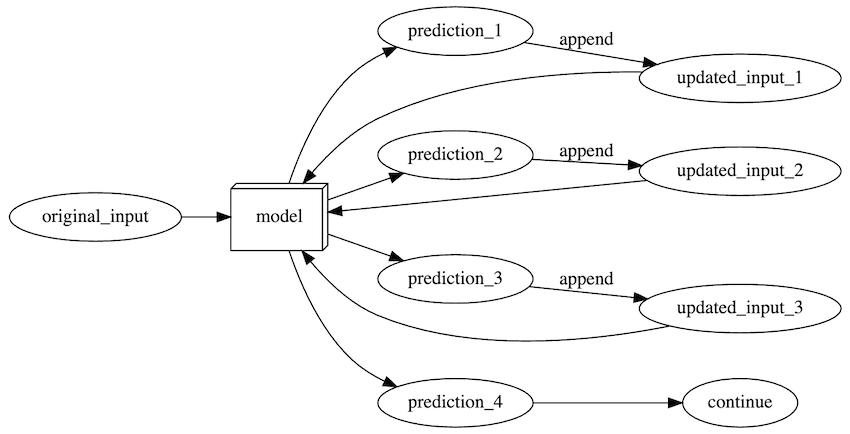

1. Function which takes as input: 
  * a list of values (the Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction 
  * Eventually future predictions will be made using the model's own previous predictions as input

In [84]:
INTO_FUTURE = 14

In [87]:
# 1 . create function to make preds in fututre
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [88]:
# make forecast in future
future_forecast = make_future_forecast(y_all,
                                       model_9,
                                       INTO_FUTURE,
                                       WINDOW_SIZE)

1/1 [==============================] - 0s 26ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55330.859375

1/1 [==============================] - 0s 25ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55330.859375  ] -> Prediction: 50932.734375

1/1 [==============================] - 0s 28ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55330.859375   50932.734375  ] -> Prediction: 51193.3828125

1/1 [==============================] - 0s 26ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55330.859375   50932.734375   51193.3828125 ] -> Prediction: 46029.68359375

1/1 [==============================] - 0s 29ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55330.859375
 50932.734375   51193.3828125  46029.68359375

PLot future forecast

In [104]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [105]:
last_timesteps = bitcoin_prices.index[-1]
last_timesteps

Timestamp('2021-05-18 00:00:00')

In [106]:
# get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timesteps,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [107]:
next_time_steps = np.insert(next_time_steps, 0, last_timesteps)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 43144.473, 43144.473, 55330.86 , 50932.734, 51193.383,
        46029.684, 47272.82 , 44572.965, 48991.43 , 53400.08 , 51131.336,
        48628.773, 44837.457, 46409.35 , 46553.17 , 51728.625],
       dtype=float32))

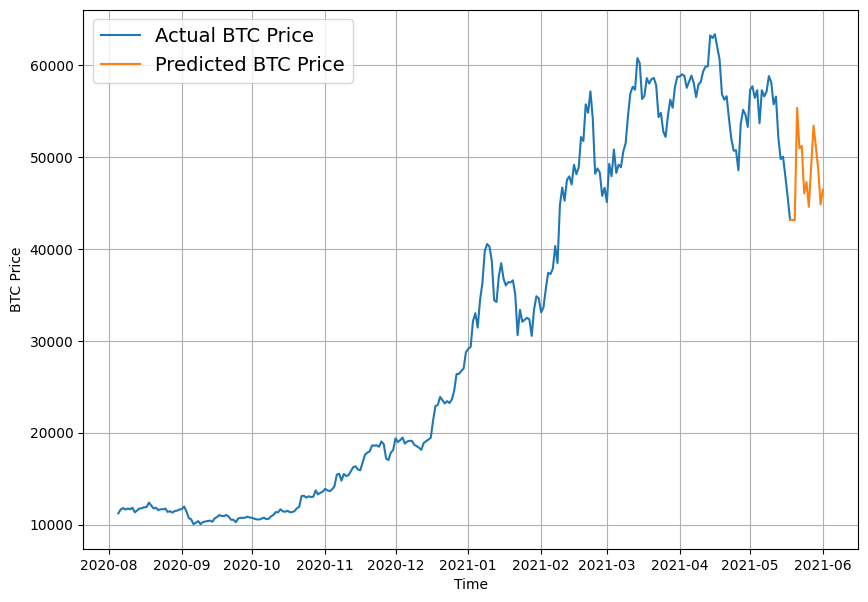

In [109]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast[:15], format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem )

When creating any kind of forecast, you must keep the **turkey problem** in mind.

The **turkey problem** is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

In [112]:
# let introduce a turkey problm into BTC data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [113]:
btc_price_turkey[-5:]

[49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [115]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-5:]

array(['2021-05-14T00:00:00.000000000', '2021-05-15T00:00:00.000000000',
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

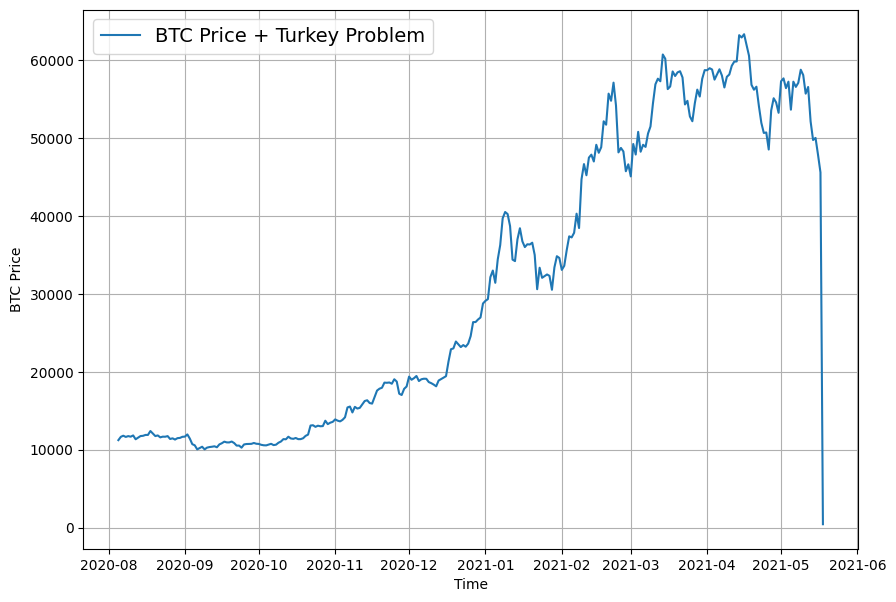

In [116]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [121]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, y_train, X_test, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [122]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=1,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

Epoch 1/100
70/70 [==============================] - 2s 12ms/step - loss: 1110.5944 - val_loss: 1170.2020
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 172.7225 - val_loss: 1060.9122
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 175.2119 - val_loss: 955.3546
Epoch 4/100
70/70 [==============================] - 1s 10ms/step - loss: 158.5131 - val_loss: 909.7233
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 152.5573 - val_loss: 1033.3571
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 138.4234 - val_loss: 815.2855
Epoch 7/100
70/70 [==============================] - 1s 10ms/step - loss: 131.5910 - val_loss: 803.8521
Epoch 8/100
70/70 [==============================] - 1s 14ms/step - loss: 133.6319 - val_loss: 802.2945
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 133.1945 - val_loss: 1023.7129
Epoch 10/100
70/70 [==============================] - 1s 14ms/

In [123]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 711.5681


711.5680541992188

In [124]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8708.21 , 8659.057, 8922.856, 8645.144, 8619.73 , 8615.732,
       8548.049, 8404.876, 8336.486, 8412.248], dtype=float32)>

In [128]:
turkey_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                y_pred=turkey_preds)
turkey_results

{'mae': 711.5681,
 'mse': 4888591.5,
 'rmse': 2211.0159,
 'mape': 21.525618,
 'mase': 1.101154}

In [129]:
model_1_results

{'mae': 572.2618,
 'mse': 1179592.1,
 'rmse': 1086.0903,
 'mape': 2.5665255,
 'mase': 1.0053054}

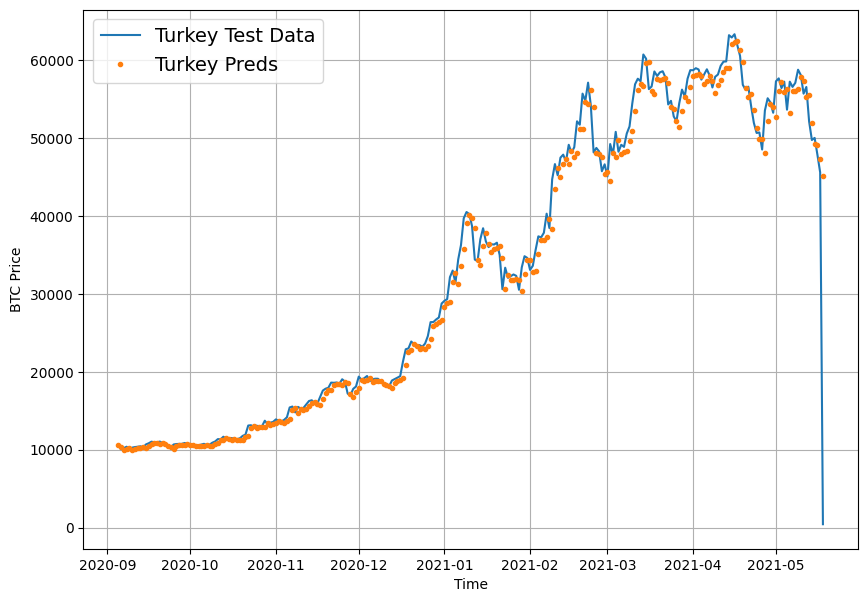

In [130]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

## Compare Models

In [132]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": baseline_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

NameError: ignored

In [133]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

NameError: ignored